In [5]:
from tensorflow.keras.datasets import imdb
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# 영화 리뷰는 X_train에, 감성 정보는 y_train에 저장된다.
# 테스트용 리뷰는 X_test에, 테스트용 리뷰의 감성 정보는 y_test에 저장된다.
(X_train, y_train), (X_test, y_test) = imdb.load_data()
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))

print(X_train[0])
print(y_train[0])

17465344/17464789 [==============================] - 2s 0us/step
훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 13

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


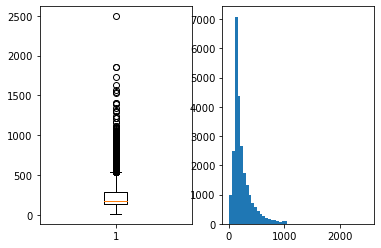

In [8]:
len_result = [len(s) for s in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(len_result)))
print('리뷰의 평균 길이 : {}'.format(np.mean(len_result)))

plt.subplot(1,2,1)
plt.boxplot(len_result)
plt.subplot(1,2,2)
plt.hist(len_result, bins=50)
plt.show()

In [9]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


In [10]:
word_to_index = imdb.get_word_index()
index_to_word={}
for key, value in word_to_index.items():
    index_to_word[value] = key

1646592/1641221 [==============================] - 1s 0us/step


In [11]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))

빈도수 상위 1번 단어 : the


In [12]:
print('빈도수 상위 3941번 단어 : {}'.format(index_to_word[3941]))

빈도수 상위 3941번 단어 : journalist


In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [14]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 5000)

In [15]:
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [16]:
model = Sequential()
model.add(Embedding(5000, 120))
model.add(LSTM(120))
model.add(Dense(1, activation='sigmoid'))

In [17]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, callbacks=[es, mc])

Epoch 1/10
391/391 [==============================] - ETA: 0s - loss: 0.4807 - acc: 0.7636
Epoch 00001: val_acc improved from -inf to 0.84596, saving model to best_model.h5
391/391 [==============================] - 408s 1s/step - loss: 0.4807 - acc: 0.7636 - val_loss: 0.3987 - val_acc: 0.8460
Epoch 2/10
391/391 [==============================] - ETA: 0s - loss: 0.3061 - acc: 0.8766
Epoch 00002: val_acc did not improve from 0.84596
391/391 [==============================] - 476s 1s/step - loss: 0.3061 - acc: 0.8766 - val_loss: 0.3817 - val_acc: 0.8263
Epoch 3/10
391/391 [==============================] - ETA: 0s - loss: 0.2357 - acc: 0.9077
Epoch 00003: val_acc improved from 0.84596 to 0.85948, saving model to best_model.h5
391/391 [==============================] - 424s 1s/step - loss: 0.2357 - acc: 0.9077 - val_loss: 0.3345 - val_acc: 0.8595
Epoch 4/10
391/391 [==============================] - ETA: 0s - loss: 0.2165 - acc: 0.9136
Epoch 00004: val_acc improved from 0.85948 to 0.87424

In [30]:
a = np.random.normal(size =100)


AttributeError: 'list' object has no attribute 'replace'

In [36]:
B = """-0.08614102,  0.27654024,  0.89495368,  0.41420759,  1.62456005,
-0.33855729, -0.83038163, -0.98741016, -0.86336372, -0.46057282,
-0.84770005,  0.52202933,  0.69577994,  0.04639981, -0.77995225,
-1.31976384,  0.40578822, -0.37490976,  0.31316824, -1.15165888,
0.47868109,  0.21012114,  1.05453267, -0.1112672, 1.15994267,
0.49655696,  0.82023714,  1.95796233,  1.03184381,  0.33386916,
0.03472399,  1.12146567,  0.39967922, -0.13662467,  1.72956827,
-0.51620378, -1.36180343, -1.48099491,  0.38377728, -0.20797315,
1.46046342,  0.65543754, -0.62680953, -0.38907937, -0.3632367 ,
0.79650207, -0.77025824,  0.77637997, -0.34211692,  1.15252219,
-0.31717885, -0.00453982, -0.62353936, -1.4046471 , -1.07390436,
-1.07307974,  0.21937285, -1.73192209, -0.091317  ,  0.38817384,
0.17685415, -0.76815545, -0.64125447,  0.25787911,  0.83089795,
-0.14465505, -0.23923142, -1.23141355,  0.06188245, -0.44639805,
0.191714  ,  1.40596086,  2.47942587,  0.70438992,  0.62379098,
-0.30894806, -0.83353702,  0.64823276,  0.88601385, -1.47315633,
0.6958867 ,  0.63905276, -1.06625944, -1.33501982,  1.99197749,
1.50133895,  1.19400813, -1.61409565, -0.33305413, -0.27854724,
0.46061103, -0.84067471, -0.43859999, -0.28556632, -0.14161649,
0.76755039, -1.82507856, -0.39183048,  0.25355122,  1.41184215""".split(",")
B = [b.replace('\n',"") for b in B]
B = [b.replace(' ',"") for b in B]
B = [b+'f' for b in B]
",".join(B)

'-0.08614102f,0.27654024f,0.89495368f,0.41420759f,1.62456005f,-0.33855729f,-0.83038163f,-0.98741016f,-0.86336372f,-0.46057282f,-0.84770005f,0.52202933f,0.69577994f,0.04639981f,-0.77995225f,-1.31976384f,0.40578822f,-0.37490976f,0.31316824f,-1.15165888f,0.47868109f,0.21012114f,1.05453267f,-0.1112672f,1.15994267f,0.49655696f,0.82023714f,1.95796233f,1.03184381f,0.33386916f,0.03472399f,1.12146567f,0.39967922f,-0.13662467f,1.72956827f,-0.51620378f,-1.36180343f,-1.48099491f,0.38377728f,-0.20797315f,1.46046342f,0.65543754f,-0.62680953f,-0.38907937f,-0.3632367f,0.79650207f,-0.77025824f,0.77637997f,-0.34211692f,1.15252219f,-0.31717885f,-0.00453982f,-0.62353936f,-1.4046471f,-1.07390436f,-1.07307974f,0.21937285f,-1.73192209f,-0.091317f,0.38817384f,0.17685415f,-0.76815545f,-0.64125447f,0.25787911f,0.83089795f,-0.14465505f,-0.23923142f,-1.23141355f,0.06188245f,-0.44639805f,0.191714f,1.40596086f,2.47942587f,0.70438992f,0.62379098f,-0.30894806f,-0.83353702f,0.64823276f,0.88601385f,-1.47315633f,0.69588